In [2]:
import requests 
from bs4 import BeautifulSoup
from urllib import request

In [12]:
year = ["15", "16", "17"]
month = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

ym = {}

for y in year:
    mon = []
    for m in month:
        a = '{}{}'.format(y, m)
        mon.append(a)
    ym[y] = mon

In [19]:
ym[year[0]]

['1501',
 '1502',
 '1503',
 '1504',
 '1505',
 '1506',
 '1507',
 '1508',
 '1509',
 '1510',
 '1511',
 '1512']

In [28]:
# JPXの投資部門別売買動向の金額掲載のエクセルファイルのアドレスをゲット

url = "http://www.jpx.co.jp"   # JPXのアドレス

# http://www.jpx.co.jp/markets/statistics-equities/investor-type/00-01-archives-02.html  2015年
# http://www.jpx.co.jp/markets/statistics-equities/investor-type/00-01-archives-01.html  2016年
# http://www.jpx.co.jp/markets/statistics-equities/investor-type/00-01.html  2017年

url_lists = ["http://www.jpx.co.jp/markets/statistics-equities/investor-type/00-01-archives-02.html",
           "http://www.jpx.co.jp/markets/statistics-equities/investor-type/00-01-archives-01.html",
           "http://www.jpx.co.jp/markets/statistics-equities/investor-type/00-01.html"]
# 年別投資部門売買動向アドレス

cnt = 0
adv = {} # 最終的な売買動向取得アドレス収納用
for url_list in url_lists:
    r = requests.get(url_list)
    soup = BeautifulSoup(r.content, "lxml")
    address_soup = soup.find_all('a')
    
    address_list =[]
    for address in address_soup:
        href_soup = address.get('href')
        address_list.append(href_soup)
        
    months = ym[year[cnt]]
    adr = []
    for ad in address_list:
        for month in months:
            if "/stock_val_1_m{}.xls".format(month) in ad:
                adr.append(ad)
    adv[year[cnt]] = adr
    
    cnt += 1

In [40]:
# 上で取ったアドレスからエクセルを自分のPCに落とす

for i in adv:
    if i == "15":
        for address3 in adv[i]:
            url3 = url + address3
            r = request.urlopen(url3)
            
            with open('2015/{}'.format(address3[-8:]), 'wb') as f:
                f.write(r.read())
    elif i == "16":
        for address3 in adv[i]:
            url3 = url + address3
            r = request.urlopen(url3)
            
            with open('2016/{}'.format(address3[-8:]), 'wb') as f:
                f.write(r.read())
    
    elif i == '17':
        for address3 in adv[i]:
            url3 = url + address3
            r = request.urlopen(url3)
            
            with open('2017/{}'.format(address3[-8:]), 'wb') as f:
                f.write(r.read())
            
        

In [88]:
# PCのファイルから欲しいデータだけ取る(東証1部、マザーズ市場の個人投資家、海外投資家のマーケットシェア)
import os
import pandas as pd 

years = ['2015', '2016', '2017']

share = {}
share_y = {}  # 東証1部シェア（個人、海外投資家）
share_m = {}  # マザーズシェア（個人、海外投資家）
for year in years:
    files = os.listdir(year)
    

    for file in files:
        df = pd.read_excel('{}/{}'.format(year, file), sheetname= "TSE 1st")
        dfm = pd.read_excel('{}/{}'.format(year, file), sheetname= "TSE Mothers")
        
        share_y[file[:4]] = [float(df.iloc[27,5]), float(df.iloc[30,5])]
        share_m[file[:4]] = [float(dfm.iloc[27,5]), float(dfm.iloc[30,5])]

In [89]:
share_y1 = pd.DataFrame(share_y).T
share_y1.columns = ['個人', '海外投資家']
share_m1 = pd.DataFrame(share_m).T
share_m1.columns = ['個人', '海外投資家']

In [90]:
share_y1

,個人,海外投資家
1501,18.7,72.7
1502,20.3,69.8
1503,21.6,69.5
1504,20.7,70.0
1505,21.4,69.1
1506,20.2,70.4
1507,20.6,70.4
1508,20.2,71.1
1509,16.0,75.9
1510,17.2,73.0


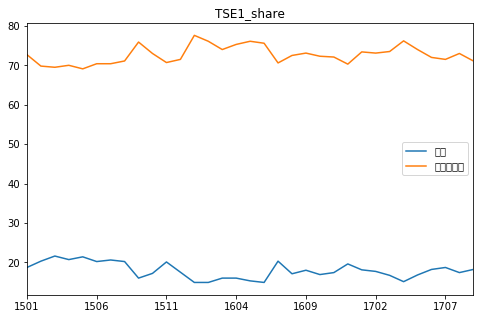

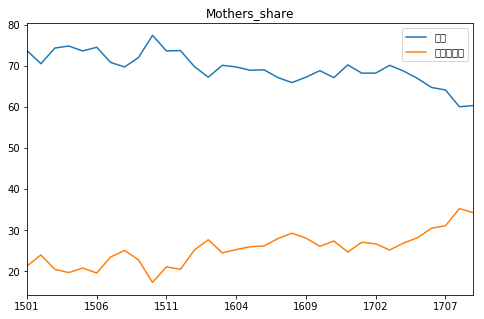

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
share_y1.plot(title='TSE1_share', figsize=(8,5))
share_m1.plot(title='Mothers_share',figsize=(8,5))

In [93]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()
p = figure(plot_width=400, plot_height=300)
p.line(share_y1.index, share_y1['個人'])
p.line(share_y1.index, share_y1['海外投資家'])

show(p)

Loading BokehJS ...